In [1]:
import xarray as xr
from utils.data import load_atmospheric_predictor

# Define the variables and region
variables = ["msl", "msl_gradient"]
region = (200, -10, 360, 80)
estela = False

# Load the ERA5 dynamic predictors
era5_dynamic = load_atmospheric_predictor(
    variables=variables, region=region, estela=estela
)
era5_dynamic

<xarray.Dataset> Size: 208MB
Dimensions:       (time: 16032, latitude: 30, longitude: 54)
Coordinates:
  * latitude      (latitude) float32 120B 79.62 76.62 73.62 ... -4.375 -7.375
  * time          (time) datetime64[s] 128kB 1980-01-01 ... 2023-11-22
  * longitude     (longitude) float32 216B 200.4 203.4 206.4 ... 356.4 359.4
Data variables:
    msl           (time, latitude, longitude) float32 104MB 1.044e+05 ... 1.0...
    msl_gradient  (time, latitude, longitude) float32 104MB 0.0 0.0 ... 0.0 0.0

In [2]:
era5_dynamic.nbytes * 1e-9

0.207903312

In [3]:
from bluemath_tk.datamining.pca import PCA
from bluemath_tk.datamining.kma import KMA
from bluemath_tk.predictor.xwt import XWT

pca = PCA(n_components=0.9)
kma = KMA(num_clusters=36, seed=42)

xwt = XWT(steps={"pca": pca, "kma": kma})
xwt.fit(
    data=era5_dynamic,
    fit_params={
        "pca": {
            "vars_to_stack": variables,
            "coords_to_stack": ["latitude", "longitude"],
            "pca_dim_for_rows": "time",
        },
        "kma": {
            "normalize_data": False,
            "min_number_of_points": 10,
        },
    },
    variable_to_sort_bmus="msl",
)
xwt.save_model("outputs/dwt_model_aveiro.pkl")

2025-03-31 18:30:30,485 - PCA - WARNING - Setting self.num_workers to 1. Change it using self.set_num_processors_to_use method.
2025-03-31 18:30:30,487 - KMA - WARNING - Setting self.num_workers to 1. Change it using self.set_num_processors_to_use method.
2025-03-31 18:30:30,490 - XWT - WARNING - Setting self.num_workers to 1. Change it using self.set_num_processors_to_use method.



        -------------------------------------------------------------------
        | Initializing PCA reduction model with the following parameters:
        |    - n_components: 0.9
        |    - is_incremental: False
        | For more information, please refer to the documentation.
        -------------------------------------------------------------------
        


2025-03-31 18:30:56,722 - PCA - WARNING - Attribute pcs is an xarray Dataset / Dataarray and will be pickled!


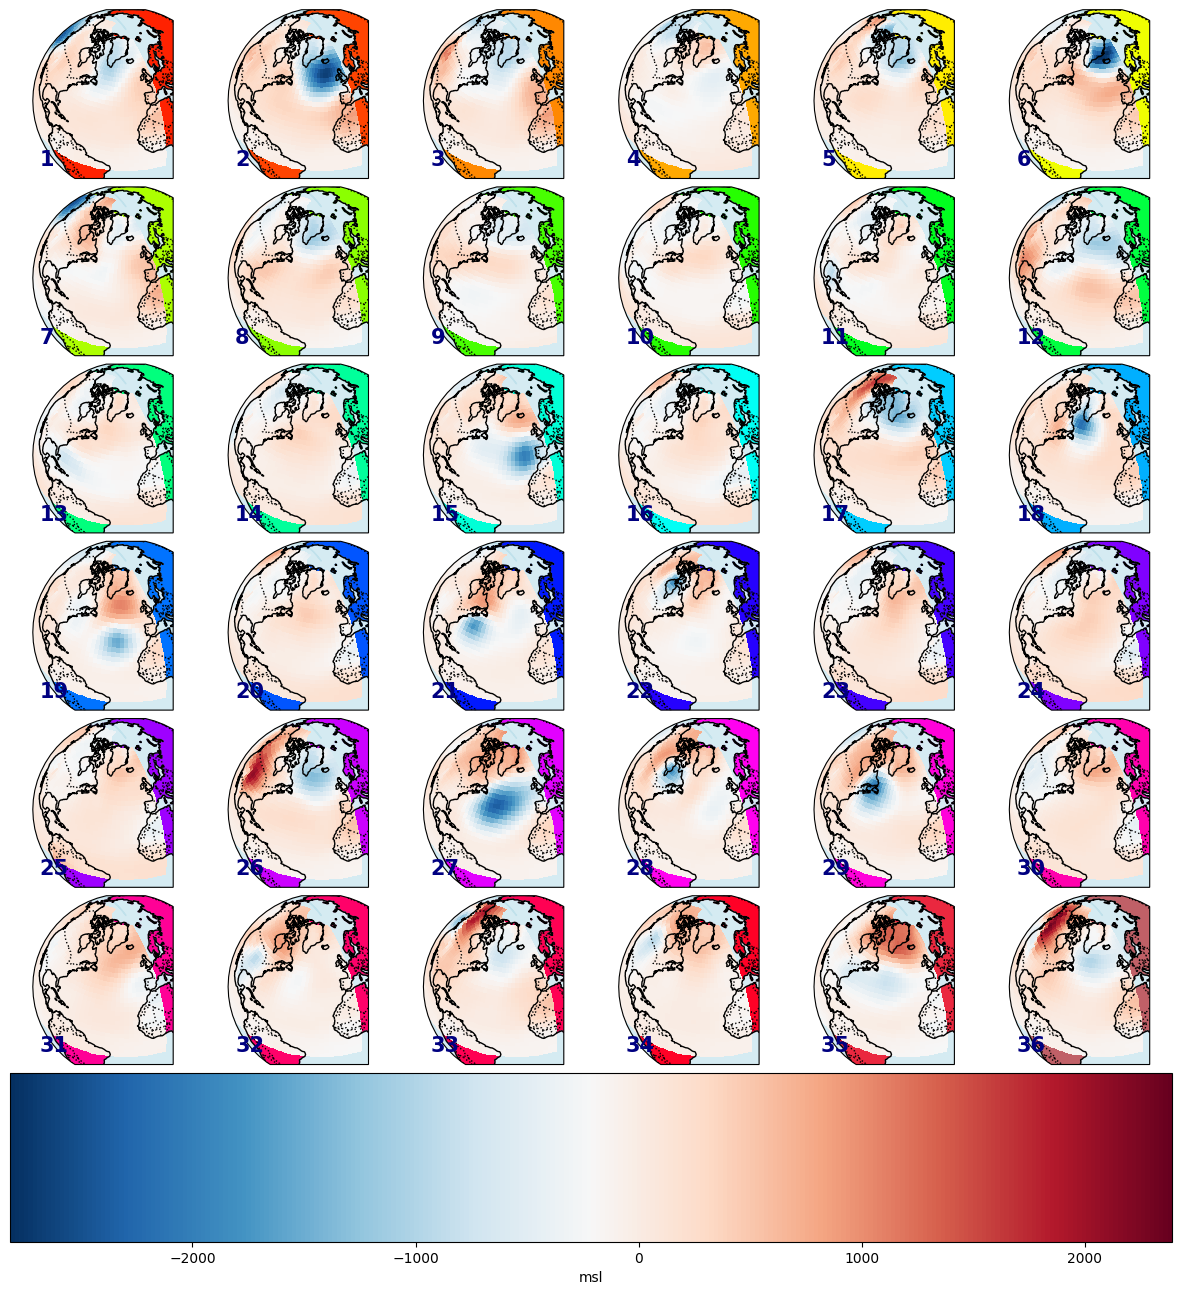

In [4]:
xwt.plot_xwts(var_to_plot="msl", anomaly=True, map_center=(-25, 40))

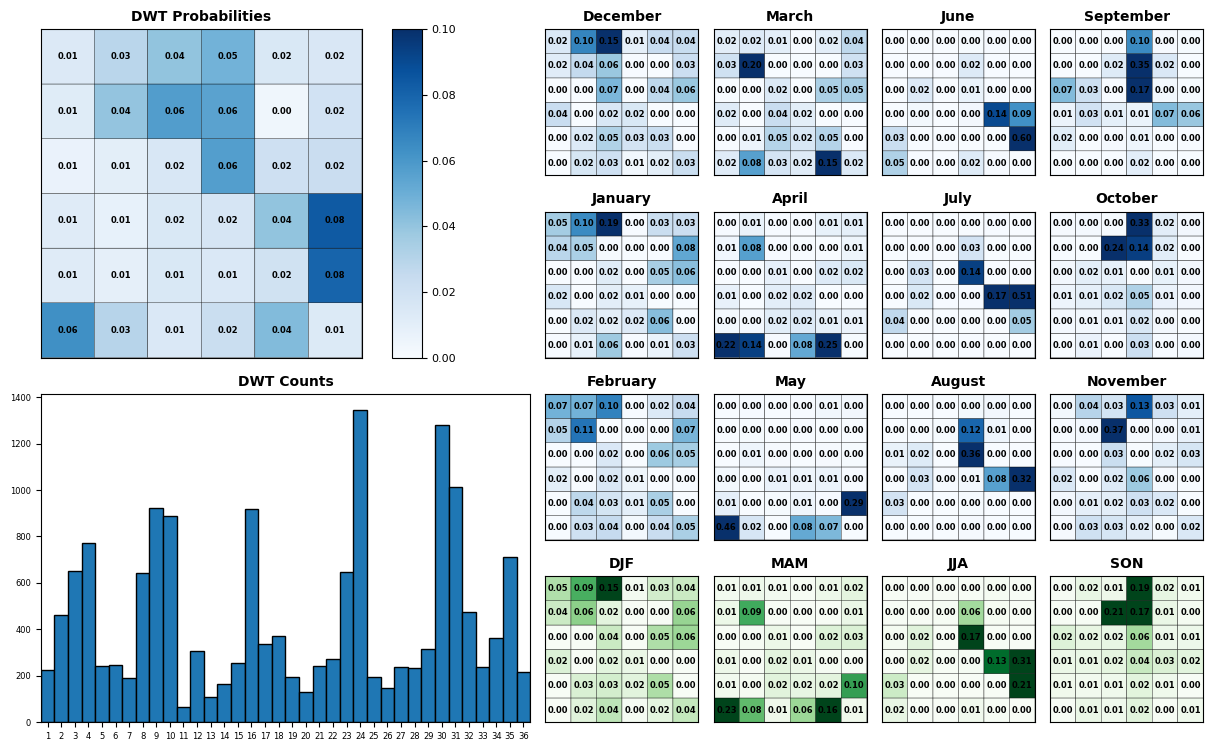

In [5]:
xwt.plot_dwts_probs(plot_text=True)

<Axes: >

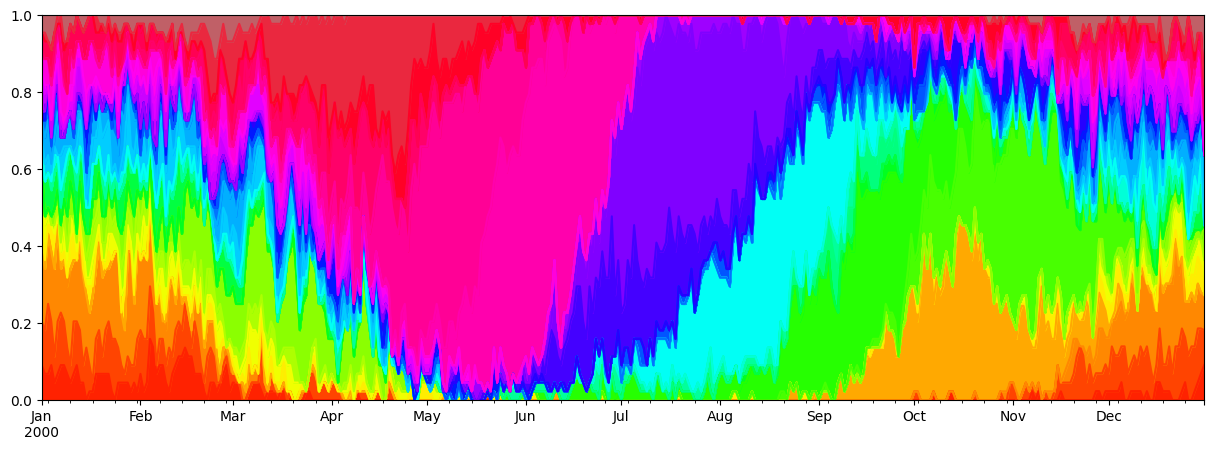

In [6]:
xwt.plot_perpetual_year()